


---



---



---


---



---



---



---



---



---



---



---



---



---



#One Day Internationals - Country Records and Statistics - Matches


http://stats.espncricinfo.com/wi/content/records/283878.html

In [ ]:
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup as soup
url = "http://stats.espncricinfo.com/ci/engine/records/index.html?class=2;id=6;type=team"
uclient = ureq(url)
page_html = uclient.read()
uclient.close()
page_soup = soup(page_html, 'html.parser')
body = page_soup.body
#print(body.prettify())



---



---



---



---



In [ ]:
from urllib.request import urlopen as ureq
from bs4 import BeautifulSoup
import requests
url = 'http://www.howstat.com/cricket/Statistics/Matches/MatchListCountry_ODI.asp?A=IND'
page = requests.get(url)
html = BeautifulSoup(page.content,'html.parser')
div1 = html.findAll("a",{"class":"LinkNormal"})

In [ ]:
import requests
import lxml.html as lh
import pandas as pd
Cricket_ODI = pd.DataFrame(columns=['Players_Name' , '-' ,'Run','BF',	'4s','6s','SR','% of Total' ,'Team','Year'])
Total_ODI_MATACHES = len(div1)
count = 0
prefix = 'http://www.howstat.com/cricket/Statistics/Matches/'
for i in range(Total_ODI_MATACHES):
    suffix = div1[i].get('href')
    link = prefix + suffix
    #Create a handle, page, to handle the contents of the website
    page = requests.get(link)
    html = BeautifulSoup(page.content,'html.parser')
    #Store the contents of the website under doc
    doc = lh.fromstring(page.content)
    #Parse data that are stored between <tr>..</tr> of HTML
    tr_elements = doc.xpath('//tr')
    count+=1
    print('COUNT_NO : ' , count)
    val = 0
    for j in range(0,35):
        col2 = []
        for t in tr_elements[j]:
            name=t.text_content()
            c=name.strip()
            col2.append(c)
        if len(col2)in [6,7,8]:
            if(col2[1]=='R' and col2[2]=='BF' and col2[3]=='4s'):
                print(col2)
                val = j
       
    
    
    team1 =[]
    full1 = []
    #For each row, store each first element (header) and an empty list
    if(val>0):
        for j in range(val+1,val+12):
            i=0
            col = []
            for t in tr_elements[j]:
                i+=1
                name=t.text_content()
                #print('%d:"%s"'%(i,name.strip()))
                #col = pd.DataFrame(name.strip())
                col.append(name.strip())
            full1.append(col)

            col1 = []
            for t in tr_elements[val]:
                name=t.text_content()
                c=name.strip()
                col1.append(c)
            team1.append(col1[0])

    
    top = 0
    l = len(tr_elements)
    for j in range(val+12,l):
        col2 = []
        for t in tr_elements[j]:
            name=t.text_content()
            c=name.strip()
            col2.append(c)
        if len(col2)in [6,7,8]:
            if(col2[1]=='R' and col2[2]=='BF' and col2[3]=='4s'):
                print(col2)
                top = j
    print(val)
    print(top)     
    
    
    team2 = [] 
    full2 = []
    #For each row, store each first element (header) and an empty list
    if(top>0):
        for j in range(top+1,top+12):
            i=0
            col = []
            for t in tr_elements[j]:
                i+=1
                name=t.text_content()
                #print('%d:"%s"'%(i,name.strip()))
                #col = pd.DataFrame(name.strip())
                col.append(name.strip())
            full2.append(col)

            col2 = []
            for t in tr_elements[top]:
                name=t.text_content()
                c=name.strip()
                col2.append(c)
            team2.append(col2[0])

    full = full1 + full2
    team = team1 + team2
    
#     against=[]
#     if(len(team1)>0 and len(team2)>0):
#         against = team1[0] + ' VS. ' + team2[0]
        
    year = html.find_all('td' , {'class' :'TextBlack8'})[0].text.strip().split()[2]
    
    df = pd.DataFrame(full , columns=['Players_Name' , '-' ,'Run','BF',	'4s','6s','SR','% of Total'])
    df['Team'] = team
    df['Year'] = year
    #df['Between'] = against
    Cricket_ODI  = pd.concat([Cricket_ODI , df])


COUNT_NO :  1
['India', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['England\xa0(target 266)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
53
COUNT_NO :  2
['India', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['England\xa0(target 172)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
53
COUNT_NO :  3
['England', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['India\xa0(target 335)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
52
COUNT_NO :  4
['East Africa', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['India\xa0(target 121)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
53
COUNT_NO :  5
['India', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['New Zealand\xa0(target 231)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
53
COUNT_NO :  6
['India', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['New Zealand\xa0(target 155)', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
25
54
COUNT_NO :  7
['New Zealand', 'R', 'BF', '4s', '6s', 'SR', '% of Total']
['India\xa0(target 237)', 'R', 'BF', '4s', '6s', 'S

In [ ]:
Cricket_ODI.to_csv('Cricket_ODI.csv' , index=False)



---



---



---



---

#As we don't have data of 24 matches     
  > 60,64,167, 202,246,  321,330,341,366,412,539,540,569,624,640, 674,708,715,720,732, 844,856,871,913    
  
So we are just escaping it. if we'll get any information related then it will be added.

In [ ]:
import requests
import lxml.html as lh
import pandas as pd
Total_ODI_MATACHES = len(div1)
links = []
prefix = 'http://www.howstat.com/cricket/Statistics/Matches/'
for i in range(Total_ODI_MATACHES):
    suffix = div1[i].get('href')
    link = prefix + suffix
    links.append(link)
print(len(links))

966


In [ ]:
remain = [60,64,167, 202,246, 321,330,341,366,412,539,540,569,624,640, 674,708,715,720,732, 844,856,871,913]
remain_links = []
for i in remain:
    remain_links.append(links[i-1])
    
print(len(remain_links))
remain_links[:5]

24


['http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0323',
 'http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0327',
 'http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0652',
 'http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0783',
 'http://www.howstat.com/cricket/Statistics/Matches/MatchScorecard_ODI.asp?MatchCode=0984']

In [ ]:
# from google.colab import files
# files.upload()

In [ ]:
import pandas as pd
Cricket_ODI = pd.read_csv('Cricket_ODI.csv')
print(Cricket_ODI.shape)
Cricket_ODI.tail()

(20988, 10)


,Players_Name,-,Run,BF,4s,6s,SR,% of Total,Team,Year
20983,R A Jadeja,st Carey b Zampa,0.0,3.0,0.0,0.0,0.00,NaN,India (target 273),2019
20984,B Kumar,c Finch b Cummins,46.0,54.0,3.0,2.0,85.19,19.41%,India (target 273),2019
20985,Mohammed Shami,c & b Richardson,3.0,7.0,0.0,0.0,42.86,1.27%,India (target 273),2019
20986,Kuldeep Yadav,b Stoinis,8.0,12.0,1.0,0.0,66.67,3.38%,India (target 273),2019
20987,J J Bumrah,not out,1.0,4.0,0.0,0.0,25.00,0.42%,India (target 273),2019


In [ ]:
# liss = []
# for i in range(len(Cricket_ODI)):
#     liss.append(i)
# Cricket_ODI['index'] = liss

#Feature Engineering

In [ ]:
Cricket_ODI.reset_index(inplace=True)

In [ ]:
Cricket_ODI.drop(['index'], inplace=True , axis=1)
print(Cricket_ODI.shape)
Cricket_ODI.tail(5)


(20988, 10)


,Players_Name,-,Run,BF,4s,6s,SR,% of Total,Team,Year
20983,R A Jadeja,st Carey b Zampa,0.0,3.0,0.0,0.0,0.00,NaN,India (target 273),2019
20984,B Kumar,c Finch b Cummins,46.0,54.0,3.0,2.0,85.19,19.41%,India (target 273),2019
20985,Mohammed Shami,c & b Richardson,3.0,7.0,0.0,0.0,42.86,1.27%,India (target 273),2019
20986,Kuldeep Yadav,b Stoinis,8.0,12.0,1.0,0.0,66.67,3.38%,India (target 273),2019
20987,J J Bumrah,not out,1.0,4.0,0.0,0.0,25.00,0.42%,India (target 273),2019


In [ ]:
Cricket_ODI.drop(['-','SR' ,'% of Total' , 'BF'], inplace=True , axis=1)
print(Cricket_ODI.shape)
Cricket_ODI.tail(5)

(20988, 6)


,Players_Name,Run,4s,6s,Team,Year
20983,R A Jadeja,0.0,0.0,0.0,India (target 273),2019
20984,B Kumar,46.0,3.0,2.0,India (target 273),2019
20985,Mohammed Shami,3.0,0.0,0.0,India (target 273),2019
20986,Kuldeep Yadav,8.0,1.0,0.0,India (target 273),2019
20987,J J Bumrah,1.0,0.0,0.0,India (target 273),2019


In [ ]:
df = Cricket_ODI.copy()
print(df.shape)

(20988, 6)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988 entries, 0 to 20987
Data columns (total 6 columns):
Players_Name    20988 non-null object
Run             16474 non-null float64
4s              16474 non-null float64
6s              16474 non-null float64
Team            20988 non-null object
Year            20988 non-null int64
dtypes: float64(3), int64(1), object(2)
memory usage: 983.9+ KB


In [ ]:
print(Cricket_ODI['Team'].nunique())
#print(list(Cricket_ODI['Team'].values))
k=[]
for i in list(Cricket_ODI['Team'].values):
    k.append(i.split('\xa0(')[0])
print(len(set(k)) , set(k))

604
20 {'Bermuda', 'Bangladesh', 'West Indies', 'United Arab Emirates', 'East Africa', 'New Zealand', 'Australia', 'South Africa', 'Scotland', 'Hong Kong', 'India', 'Sri Lanka', 'Pakistan', 'Zimbabwe', 'Namibia', 'Kenya', 'Ireland', 'Afghanistan', 'England', 'Netherlands'}


In [ ]:
df['Country'] = k
df.drop(['Team'], inplace=True , axis=1)
print(df.shape)
df.tail(5)

(20988, 6)


,Players_Name,Run,4s,6s,Year,Country
20983,R A Jadeja,0.0,0.0,0.0,2019,India
20984,B Kumar,46.0,3.0,2.0,2019,India
20985,Mohammed Shami,3.0,0.0,0.0,2019,India
20986,Kuldeep Yadav,8.0,1.0,0.0,2019,India
20987,J J Bumrah,1.0,0.0,0.0,2019,India


In [ ]:
df.Country.value_counts()

India                   10505
Sri Lanka                1694
Australia                1474
Pakistan                 1430
West Indies              1364
New Zealand              1144
England                  1089
South Africa              902
Zimbabwe                  693
Bangladesh                374
Kenya                     143
United Arab Emirates       33
Ireland                    33
Hong Kong                  22
Netherlands                22
Afghanistan                22
East Africa                11
Namibia                    11
Bermuda                    11
Scotland                   11
Name: Country, dtype: int64

No handles with labels found to put in legend.


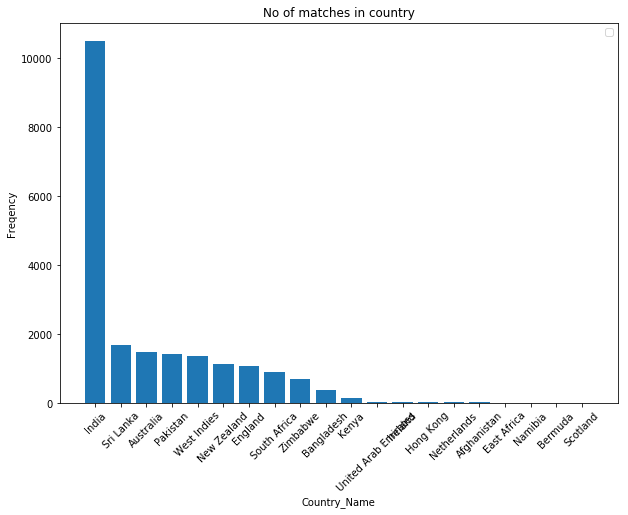

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
label = list(df.Country.value_counts().index)
no_country = list(df.Country.value_counts().values)
index = np.arange(len(label))
plt.figure(figsize=[10,7])
plt.bar(index, no_country)
plt.xlabel('Country_Name')
plt.ylabel('Freqency')  #fontsize=''
plt.xticks(index, label, rotation=45)
plt.title('No of matches in country')
plt.legend()
plt.show()

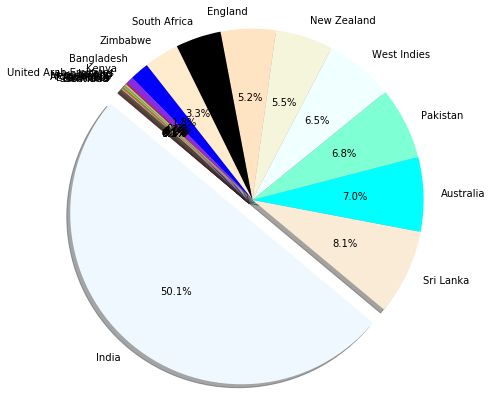

In [ ]:
import matplotlib.pyplot as plt
import matplotlib
color = []
for name, hex in matplotlib.colors.cnames.items():
    #print(name, hex)
    color.append(name)

# Data to plot
plt.figure(figsize=[7,7])
labels = list(df.Country.value_counts().index)
no_country = list(df.Country.value_counts().values)
colors = color[:20]
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # explode 1st slice

# Plot
plt.pie(no_country, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')

plt.show()

###As we don't have information about the run made by the players so I'm filling it by value ZERO.


In [ ]:
df.Run.fillna(0.0 , inplace=True)
df.Run.isna().sum()   # Calculate the null values

0

In [ ]:
df['4s'].fillna(0.0 , inplace=True)
df['4s'].isna().sum()   # Calculate the null values

0

In [ ]:
df['6s'].fillna(0.0 , inplace=True)
df['6s'].isna().sum()   # Calculate the null values

0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20988 entries, 0 to 20987
Data columns (total 6 columns):
Players_Name    20988 non-null object
Run             20988 non-null float64
4s              20988 non-null float64
6s              20988 non-null float64
Year            20988 non-null int64
Country         20988 non-null object
dtypes: float64(3), int64(1), object(2)
memory usage: 983.9+ KB


In [ ]:
print('lenght before correction : ' , Cricket_ODI['Players_Name'].nunique())
#print(list(Cricket_ODI['Players_Name'].values))
k=[]
for i in list(Cricket_ODI['Players_Name'].values):
    k.append(i.strip(''))
    
player =[]
for j in k:
    player.append(j.strip('*'))
    

print('lenght after correction : ' , len(set(player)))
print(set(player))

lenght before correction :  1706
lenght after correction :  1509
{'D R Hadlee', 'S G Peall', 'E S Szwarczynski', 'Shoaib Mohammad', 'M A Suji', 'P M Pushpakumara', 'B Stanlake', 'Saleem Raza', 'S Chattergoon', 'D G Cork', 'Manjural Islam', 'Jawahir Shah', 'Mohammad Tauqir', 'Taskin Ahmed', 'P L Taylor', 'B J Hodge', 'B R Hartland', 'J N Snape', 'G A Manou', 'D N Patel', 'K O Otieno', 'L Klusener', 'D A Gunawardene', 'D E Bernard', 'H M Amla', 'Azmat Rana', 'P A Jaques', 'Gazi Ashraf', 'J J Crowe', 'D M Wellham', 'L P C Silva', 'Hasan Ali', 'Imam-ul-Haq', 'A B Dinda', 'K J Arnott', 'C K Coventry', 'Wasim Raja', 'R I C Holder', 'V Yadav', 'Amjad Javed', 'B C Broad', 'N V Knight', 'K A Pollard', 'Saadat Ali', 'A M Salvi', 'B A Young', 'K P Pietersen', 'M G Johnson', 'Tamim Iqbal', 'I H Romaine', 'P R Reiffel', 'B Arun', 'R S Mahanama', 'C J Tavare', 'A N Ranasinghe', 'R G Sharma', 'C C Lewis', 'A R Border', 'Morshed Ali Khan', 'F M Engineer', 'F du Plessis', 'P A Wallace', 'A Y A Karim', 

In [ ]:
df['Players'] = player 
print(df.shape)
df.tail()

(20988, 7)


,Players_Name,Run,4s,6s,Year,Country,Players
20983,R A Jadeja,0.0,0.0,0.0,2019,India,R A Jadeja
20984,B Kumar,46.0,3.0,2.0,2019,India,B Kumar
20985,Mohammed Shami,3.0,0.0,0.0,2019,India,Mohammed Shami
20986,Kuldeep Yadav,8.0,1.0,0.0,2019,India,Kuldeep Yadav
20987,J J Bumrah,1.0,0.0,0.0,2019,India,J J Bumrah


In [ ]:
df.drop(['Players_Name'], inplace=True , axis=1)
print(df.shape)
df.tail(5)

(20988, 6)


,Run,4s,6s,Year,Country,Players
20983,0.0,0.0,0.0,2019,India,R A Jadeja
20984,46.0,3.0,2.0,2019,India,B Kumar
20985,3.0,0.0,0.0,2019,India,Mohammed Shami
20986,8.0,1.0,0.0,2019,India,Kuldeep Yadav
20987,1.0,0.0,0.0,2019,India,J J Bumrah


In [ ]:
print('How many years completed : ' , df.Year.nunique() , 'years')

How many years completed :  45 years


In [ ]:
pd.DataFrame(df.Year.value_counts().index , columns=['years']).sort_values(by=['years'] , ascending = True).reset_index().drop(['index'] , axis = 1)

,years
0,1974
1,1975
2,1976
3,1978
4,1979
5,1980
6,1981
7,1982
8,1983
9,1984


In [ ]:
print('Number of players who has played in ODI from the India ' , df[df.Country == 'India'].Players.nunique())

Number of players who has played in ODI from the India  226


In [ ]:
data = pd.DataFrame()
data['Player_Name'] = df[df.Country == 'India'].Players.value_counts().index
data['No of ODI Matches played'] = df[df.Country == 'India'].Players.value_counts().values
print(data.shape)
data.head(20)

(226, 2)


,Player_Name,No of ODI Matches played
0,S R Tendulkar,457
1,R Dravid,335
2,M S Dhoni,333
3,M Azharuddin,329
4,S C Ganguly,302
5,Yuvraj Singh,298
6,A Kumble,266
7,V Sehwag,238
8,J Srinath,228
9,Harbhajan Singh,228


#1. Calculate the Number of Runs made by a player in a particular year

###Enter the Input

In [ ]:
#First Example for Sachine Tendulkar in 2012
country_name = str(input())
player_name = str(input())
year_name = int(input())

India
S R Tendulkar
2012


In [ ]:
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']==year_name)]

,Run,4s,6s,Year,Country,Players
17238,2.0,0.0,0.0,2012,India,S R Tendulkar
17260,48.0,5.0,0.0,2012,India,S R Tendulkar
17304,15.0,2.0,0.0,2012,India,S R Tendulkar
17326,3.0,0.0,0.0,2012,India,S R Tendulkar
17348,22.0,3.0,0.0,2012,India,S R Tendulkar
17370,14.0,2.0,0.0,2012,India,S R Tendulkar
17392,39.0,5.0,0.0,2012,India,S R Tendulkar
17403,6.0,1.0,0.0,2012,India,S R Tendulkar
17425,114.0,12.0,1.0,2012,India,S R Tendulkar
17458,52.0,5.0,1.0,2012,India,S R Tendulkar


In [ ]:
#Second Example for MS DHONI in 2014
country_name = str(input())
player_name = str(input())
year_name = int(input())

India
M S Dhoni
2014


In [ ]:
print('Run made by the player in that particular year : ')
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']==year_name)]

Run made by the player in that particular year : 


,Run,4s,6s,Year,Country,Players
18353,40.0,2.0,2.0,2014,India,M S Dhoni
18374,56.0,7.0,1.0,2014,India,M S Dhoni
18397,50.0,2.0,3.0,2014,India,M S Dhoni
18407,79.0,6.0,3.0,2014,India,M S Dhoni
18441,47.0,3.0,0.0,2014,India,M S Dhoni
18595,52.0,6.0,0.0,2014,India,M S Dhoni
18629,0.0,0.0,0.0,2014,India,M S Dhoni
18650,0.0,0.0,0.0,2014,India,M S Dhoni
18672,29.0,1.0,1.0,2014,India,M S Dhoni
18694,8.0,0.0,0.0,2014,India,M S Dhoni


In [ ]:
print('Run made by the player in that particular year : ')
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']==year_name)].Run

Run made by the player in that particular year : 


18353    40.0
18374    56.0
18397    50.0
18407    79.0
18441    47.0
18595    52.0
18629     0.0
18650     0.0
18672    29.0
18694     8.0
18705    51.0
18726     6.0
Name: Run, dtype: float64

###Total Run made by the Player Throughout the Year:

In [ ]:
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']==year_name)].Run.values.sum()

418.0

#2. Calculate the Number of Runs made by a player from start to till now
#OR from any year  to any year (in which he played)
###Enter the Input

In [ ]:
country_name = str(input(" ENTER COUNTRY NAME : "))

 ENTER COUNTRY NAME : India


In [ ]:
player_name = str(input("ENTER PLAYER NAME : "))

ENTER PLAYER NAME : V Sehwag


In [ ]:
start_year = int(input("Enter the start year : "))

Enter the start year : 2000


In [ ]:
end_year = int(input("Enter the last year : "))

Enter the last year : 2019


In [ ]:
print('Total Mttches played by the virender sehwag from 2000 to 2019 : ' , end=' ')
print(df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']>=start_year) & (df['Year']<=end_year)].shape[0])


print("\n\n\n\nfirst 25 matches are : ")
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']>=start_year) & (df['Year']<=end_year)].head(25)

Total Mttches played by the virender sehwag from 2000 to 2019 :  237




first 25 matches are : 


,Run,4s,6s,Year,Country,Players
9965,0.0,0.0,0.0,2000,India,V Sehwag
9971,19.0,0.0,1.0,2000,India,V Sehwag
9993,58.0,8.0,0.0,2001,India,V Sehwag
10115,0.0,0.0,0.0,2001,India,V Sehwag
10136,2.0,0.0,0.0,2001,India,V Sehwag
10158,11.0,1.0,0.0,2001,India,V Sehwag
10177,4.0,1.0,0.0,2001,India,V Sehwag
10201,2.0,0.0,0.0,2001,India,V Sehwag
10224,0.0,0.0,0.0,2001,India,V Sehwag
10248,12.0,0.0,0.0,2001,India,V Sehwag


#Total Run Made by the player from start year to last year 

In [ ]:
df[(df['Country']==country_name) & (df['Players']==player_name) & (df['Year']>=start_year) & (df['Year']<=end_year)].Run.values.sum()

7994.0